In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

In [3]:
file = "../parking-citations.csv"
n = sum(1 for line in open(file)) - 1 #number of records in file (excludes header)
s = 1000000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
parkingdf = pd.read_csv(file, skiprows=skip)

C:\Users\madel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
parkingdf = parkingdf.drop(labels=['Meter Id','Ticket number','Marked Time','Plate Expiry Date','VIN','Route','Agency','Violation code'],axis=1)
parkingdf = parkingdf.replace(to_replace='nan',value=np.nan)
parkingdf = parkingdf.dropna()

In [12]:
unique_vios = parkingdf['Violation Description'].unique()
len(unique_vios)
vio_counts = parkingdf['Violation Description'].value_counts()
vio_summary_table = pd.DataFrame({"Count of Violations": vio_counts})
vio_summary_table.head()

,Count of Violations
NO PARK/STREET CLEAN,289020
METER EXP.,173384
RED ZONE,74556
PREFERENTIAL PARKING,68784
DISPLAY OF TABS,61219


In [37]:
#Madeline clean work start here
grouped_vios_df = parkingdf.groupby(['Violation Description']).count()
sorted_df = grouped_vios_df.sort_values(by ='Issue Date', ascending =False)
sorted_df= sorted_df.reset_index()
raw_vios_df = sorted_df[["Violation Description","Issue Date"]]
raw_vios_df.rename(index=str, columns={"Issue Date": "Count of Specific Violation"})
raw_vios_df.head()

#np.savetxt('final_vios.csv', final_vios,fmt='%s',delimiter=',')

,Violation Description,Issue Date
0,NO PARK/STREET CLEAN,289020
1,METER EXP.,173384
2,RED ZONE,74556
3,PREFERENTIAL PARKING,68784
4,DISPLAY OF TABS,61219


In [16]:
#Violations Sweep - update Violation Descriptions based on industry knowledge and format for standardizing violation details.

#no parking
descs = raw_vios_df['Violation Description']
nopark = descs.str.contains('NO PARK')
descs = np.where(nopark, 'NO PARKING', descs.str.replace('-', ' '))
raw_vios_df['Violation Description'] = descs

C:\Users\madel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [17]:
#no blocking
descs = raw_vios_df['Violation Description']
noblock = descs.str.contains('BLOCK')
descs = np.where(noblock, 'BLOCKING', descs.str.replace('-', ' '))
raw_vios_df['Violation Description'] = descs

C:\Users\madel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [18]:
#no curb
descs = raw_vios_df['Violation Description']
curb = descs.str.contains('CURB')
descs = np.where(curb, 'CURB', descs.str.replace('-', ' '))
raw_vios_df['Violation Description'] = descs

C:\Users\madel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
#meter expired
descs = raw_vios_df['Violation Description']
meter = descs.str.contains('METER|OVER TIME|OVERTIME')
meter
descs = np.where(meter, 'METER EXPIRED', descs.str.replace('-', ' '))
raw_vios_df['Violation Description'] = descs

C:\Users\madel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
#zones
descs = raw_vios_df['Violation Description']
zone = descs.str.contains('ZONE')
descs = np.where(zone, 'ILLEGAL ZONE', descs.str.replace('-', ' '))
raw_vios_df['Violation Description'] = descs

C:\Users\madel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
#pref parking
descs = raw_vios_df['Violation Description']
pref = descs.str.contains('PREF')
descs = np.where(pref, 'PREFERENTIAL PARKING', descs.str.replace('-', ' '))
raw_vios_df['Violation Description'] = descs

C:\Users\madel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
#Top 10 parking violation issues

final_group = raw_vios_df.groupby('Violation Description').sum()
sorted_df = final_group.sort_values(by ='Issue Date', ascending =False)
sorted_df= sorted_df.reset_index()
final_vios = sorted_df.rename(index=str, columns={"Issue Date":"Count of Violation"})
final_vios.head(10)

#np.savetxt('standardized_parking_vios2.csv', final_vios,fmt='%s',delimiter=',')

,Violation Description,Count of Violation
0,NO PARKING,334067
1,METER EXPIRED,224717
2,ILLEGAL ZONE,116559
3,PREFERENTIAL PARKING,70205
4,DISPLAY OF TABS,61219
5,DISPLAY OF PLATES,27575
6,NO STOP/STANDING,18108
7,STANDNG IN ALLEY,14162
8,CURB,13799
9,BLOCKING,12479


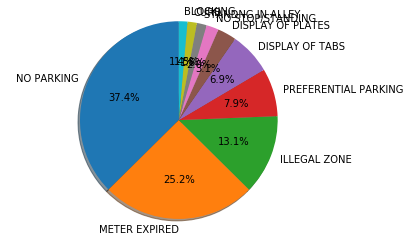

In [36]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

#just working with the top 10 [standardized] issues. Account for ~90% of violations.
top_10 = final_vios.nlargest(10, ['Count of Violation']) 
labels = top_10['Violation Description']
sizes = top_10['Count of Violation']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()